In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math


customers = pd.read_csv('BDD/customers.csv', sep=';')
products = pd.read_csv('BDD/products.csv', sep=';')
transactions = pd.read_csv('BDD/Transactions.csv', sep=';')

 <font size="6"><b>Analyse et nettoyage de la base de donnée</b></font>

In [2]:
display(customers.head())

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
display(products.head())

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [4]:
display(transactions.head())

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [5]:
transactions.describe()

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


In [6]:
#Je fais ma jointure transactions avec products à gauche pour garder les trasactions tout en prenant le prix et la
#catégorie de mon fichier products en utilisant une cle commune 'id_prod'
transactions_products = pd.merge(transactions,products, on='id_prod', how='left', indicator=True )

In [7]:
transactions_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     687534 non-null  object  
 1   date        687534 non-null  object  
 2   session_id  687534 non-null  object  
 3   client_id   687534 non-null  object  
 4   price       687534 non-null  float64 
 5   categ       687534 non-null  int64   
 6   _merge      687534 non-null  category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
transactions_products.head()

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,both
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0,both
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0,both
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0,both
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0,both


In [9]:
#Je supprime ma colonne _merge qui me sert juste de vérification lors de ma jointure
transactions_products = transactions_products.drop('_merge', axis=1)

In [10]:
#Avec cette jointure je garde les colonnes de mes deux dataframes et en utilisant comme clé 'client_id'

transactions_products_customers = pd.merge(transactions_products, customers, on='client_id', indicator=True )

In [11]:
transactions_products_customers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     687534 non-null  object  
 1   date        687534 non-null  object  
 2   session_id  687534 non-null  object  
 3   client_id   687534 non-null  object  
 4   price       687534 non-null  float64 
 5   categ       687534 non-null  int64   
 6   sex         687534 non-null  object  
 7   birth       687534 non-null  int64   
 8   _merge      687534 non-null  category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 42.6+ MB


In [12]:
transactions_products_customers.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967,both
1,1_498,2021-03-11 00:57:22.865244,s_4624,c_329,23.37,1,f,1967,both
2,0_1140,2021-03-16 10:01:30.705174,s_7071,c_329,3.73,0,f,1967,both
3,1_451,2021-03-18 17:26:18.887580,s_8134,c_329,20.99,1,f,1967,both
4,1_381,2021-04-25 13:26:06.218857,s_25561,c_329,15.99,1,f,1967,both


In [13]:
#Je supprime ma colonne _merge qui me sert juste de vérification lors de ma jointure
transactions_products_customers = transactions_products_customers.drop('_merge', axis=1)

In [14]:
transactions_products_customers.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967
1,1_498,2021-03-11 00:57:22.865244,s_4624,c_329,23.37,1,f,1967
2,0_1140,2021-03-16 10:01:30.705174,s_7071,c_329,3.73,0,f,1967
3,1_451,2021-03-18 17:26:18.887580,s_8134,c_329,20.99,1,f,1967
4,1_381,2021-04-25 13:26:06.218857,s_25561,c_329,15.99,1,f,1967


In [15]:
#Je veux que ma date se stoppe au seconde mais j'ai un problème de date, certaines heures sont en 24 au lieu de 00 (24h = 00h00)
#Je vais chercher les lignes où j'ai ces problèmes et les mettre dans un autre dataframe pour vous montrer l'incohérence
#En déplaçant ces lignes vers un autre DataFrame, nous avons conservé 99.9657 % des données, 
#avec seulement 236 lignes sur 687 534 (soit 0.0343 %) exclues en raison de dates invalides.



transactions_products_customers['date'] = pd.to_datetime(transactions_products_customers['date'], errors='coerce')

invalid_date = transactions_products_customers[transactions_products_customers['date'].isna()]

date_invalide = pd.DataFrame(invalid_date)
print(date_invalide)

       id_prod date session_id client_id  price  categ sex  birth
42645    1_280  NaT   s_102065     c_856  15.59      1   m   1964
42646    1_374  NaT   s_102065     c_856  10.71      1   m   1964
42647    1_579  NaT   s_102065     c_856  23.99      1   m   1964
45919    1_170  NaT   s_110986    c_6311  14.22      1   f   1969
72515    1_683  NaT   s_101411    c_2006  13.99      1   f   1987
...        ...  ...        ...       ...    ...    ...  ..    ...
685671   1_388  NaT   s_100390    c_7255  16.70      1   m   1983
685672   1_378  NaT   s_100390    c_7255  26.61      1   m   1983
685673   1_734  NaT   s_100390    c_7255  24.28      1   m   1983
686737   1_350  NaT   s_108934    c_8498  20.83      1   f   1999
686875   1_407  NaT   s_107280    c_6053  15.99      1   f   1974

[236 rows x 8 columns]


In [16]:
#Je veux savoir si mes dates invalides représentent telles une grosse partie du Chiffre d'affaire

ca_date_invalide = date_invalide["price"].sum()
ca_date_invalide = "{:,.2f}".format(ca_date_invalide).replace(',', ' ')

print(f"Le chiffre d'affaires total des dates invalides est de  {ca_date_invalide} €")

Le chiffre d'affaires total des dates invalides est de  4 989.55 €


On verra par la suite que ce chiffre n'aura pas un gros impact sur le CA total 

In [17]:
#Maintenant que j'ai un autre dataframe pour stocker mes dates invalides, je peux les supprimer dans mon ancien DF
transactions_products_customers.dropna(subset=['date'], inplace=True)
transactions_products_customers.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967
1,1_498,2021-03-11 00:57:22.865244,s_4624,c_329,23.37,1,f,1967
2,0_1140,2021-03-16 10:01:30.705174,s_7071,c_329,3.73,0,f,1967
3,1_451,2021-03-18 17:26:18.887580,s_8134,c_329,20.99,1,f,1967
4,1_381,2021-04-25 13:26:06.218857,s_25561,c_329,15.99,1,f,1967


In [18]:
#transactions_products_customers['date'] = transactions_products_customers['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
transactions_products_customers.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967
1,1_498,2021-03-11 00:57:22.865244,s_4624,c_329,23.37,1,f,1967
2,0_1140,2021-03-16 10:01:30.705174,s_7071,c_329,3.73,0,f,1967
3,1_451,2021-03-18 17:26:18.887580,s_8134,c_329,20.99,1,f,1967
4,1_381,2021-04-25 13:26:06.218857,s_25561,c_329,15.99,1,f,1967


In [19]:
#Je vais ajouter des colonnes pour séparer les dates c'est à dire "années", "mois" et "jour" et le temps
#Je m'en servirai pour faire des analyses comme par exemple le CA par année ou mois etc etc

transactions_products_customers['date'] = transactions_products_customers['date'].astype('datetime64[s]')
transactions_products_customers['year'] = transactions_products_customers['date'].dt.year
transactions_products_customers['month'] = transactions_products_customers['date'].dt.month
transactions_products_customers['day'] = transactions_products_customers['date'].dt.day
transactions_products_customers['time_buy'] = transactions_products_customers['date'].dt.strftime('%H:%M:%S')

transactions_products_customers.drop(columns=['date'], inplace=True)


transactions_products_customers.head()

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy
0,0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07
1,1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22
2,0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30
3,1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18
4,1_381,s_25561,c_329,15.99,1,f,1967,2021,4,25,13:26:06


In [20]:
#J'ajoute une colonne âge pour ensuite faire une discrétisation des classes c'est à dire de travailler en tranche d'âge et 
#permettre de transmettre des informations efficaces et de qualités

In [21]:
date_year = datetime.now().strftime('%Y')

transactions_products_customers['age_now'] = int(date_year) - transactions_products_customers['birth']
transactions_products_customers['age_buy'] =  transactions_products_customers['year'] - transactions_products_customers['birth']

transactions_products_customers.head()

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_now,age_buy
0,0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07,57,54
1,1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22,57,54
2,0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30,57,54
3,1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18,57,54
4,1_381,s_25561,c_329,15.99,1,f,1967,2021,4,25,13:26:06,57,54


In [22]:
#Je veux avoir sur l'âge des données quantitatives et qualititatives pour mes tests de corrélations, comme je l'ai dit ci-dessus
#j'ai besoin de faire des tranches d'âges pour "transformer" ces valeurs quantitatives en valeurs qualitatives et travailler par
#groupe
#J'utilise la formule Sturges-Huntsberger
# Soit k le nombre de classe à découper et N la population
#Formule de Sturges-Huntsberger : k = 1 + (10 ⁄ 3) × log(N)

transactions_products_customers['client_id'].value_counts()

formule_sturges = 1 + ((10/3) * math.log10(8600))

print(formule_sturges)

14.11499483747856


In [23]:
transactions_products_customers[['age_buy']].describe()

,age_buy
count,687298.000000
mean,43.844853
std,13.623060
min,17.000000
25%,35.000000
50%,42.000000
75%,51.000000
max,94.000000


In [24]:
#Je calcule la largeur de chaque tranche 

Amin = 17
Amax = 94
N = 14

I = (Amax - Amin) / N
I

5.5

In [25]:
#J'initialise une liste pour stocker les tranches d'âges
age_interval = []

#Création avec une boucle des tranches d'âges (automatisation)

for i in range(N):
    borne_inférieure = Amin + i * I
    borne_supérieure = Amin + (i + 1) * I
    age_interval.append((borne_inférieure, borne_supérieure))
    
#Voici les tranches d'âges qui s'affichent    
    
for i, (inf, sup) in enumerate(age_interval):
    print(f"Tranche {i + 1}: De {int(inf)} à {int(sup)} ans")

Tranche 1: De 17 à 22 ans
Tranche 2: De 22 à 28 ans
Tranche 3: De 28 à 33 ans
Tranche 4: De 33 à 39 ans
Tranche 5: De 39 à 44 ans
Tranche 6: De 44 à 50 ans
Tranche 7: De 50 à 55 ans
Tranche 8: De 55 à 61 ans
Tranche 9: De 61 à 66 ans
Tranche 10: De 66 à 72 ans
Tranche 11: De 72 à 77 ans
Tranche 12: De 77 à 83 ans
Tranche 13: De 83 à 88 ans
Tranche 14: De 88 à 94 ans


In [26]:
#Fonction pour attribuer les tranches d'âges au df

def assign_age(age):
    for i, (lower, upper) in enumerate(age_interval):
        if lower <= age < upper:
            return f"[{int(lower)} - {int(upper)}]"
        
#Je l'intègre à mon dataframe        
transactions_products_customers['range_age'] = transactions_products_customers['age_buy'].apply(assign_age)

transactions_products_customers.head()

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_now,age_buy,range_age
0,0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07,57,54,[50 - 55]
1,1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22,57,54,[50 - 55]
2,0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30,57,54,[50 - 55]
3,1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18,57,54,[50 - 55]
4,1_381,s_25561,c_329,15.99,1,f,1967,2021,4,25,13:26:06,57,54,[50 - 55]


In [27]:
#Je supprime la colonne age_now qui je trouve ne sert pas pour ce type d'analyse, ici on cherche l'âge où le 
#client achète le produit

transactions_products_customers.drop("age_now", axis=1, inplace=True)

display(transactions_products_customers)

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_buy,range_age
0,0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07,54,[50 - 55]
1,1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22,54,[50 - 55]
2,0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30,54,[50 - 55]
3,1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18,54,[50 - 55]
4,1_381,s_25561,c_329,15.99,1,f,1967,2021,4,25,13:26:06,54,[50 - 55]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,0_2194,s_181130,c_177,6.57,0,m,1973,2022,3,18,23:53:54,49,[44 - 50]
687530,0_1059,s_196094,c_177,18.99,0,m,1973,2022,4,18,23:45:11,49,[44 - 50]
687531,0_2194,s_196094,c_177,6.57,0,m,1973,2022,4,18,23:53:54,49,[44 - 50]
687532,0_1059,s_343601,c_177,18.99,0,m,1973,2023,2,18,23:45:11,50,[50 - 55]


In [28]:
df_library = transactions_products_customers

<font size="6"><b>Visualisation des données par opération</b></font>

<font size="5"><b>Les Customers</b></font>

In [29]:
#Je veux savoir le nombre de client par âge, je reprend le df des customers car avec le df_library cela implique les transactions
#ça pourrait fausser mes analyses

date_year = datetime.now().strftime('%Y')

customers['age'] = int(date_year) - customers['birth']

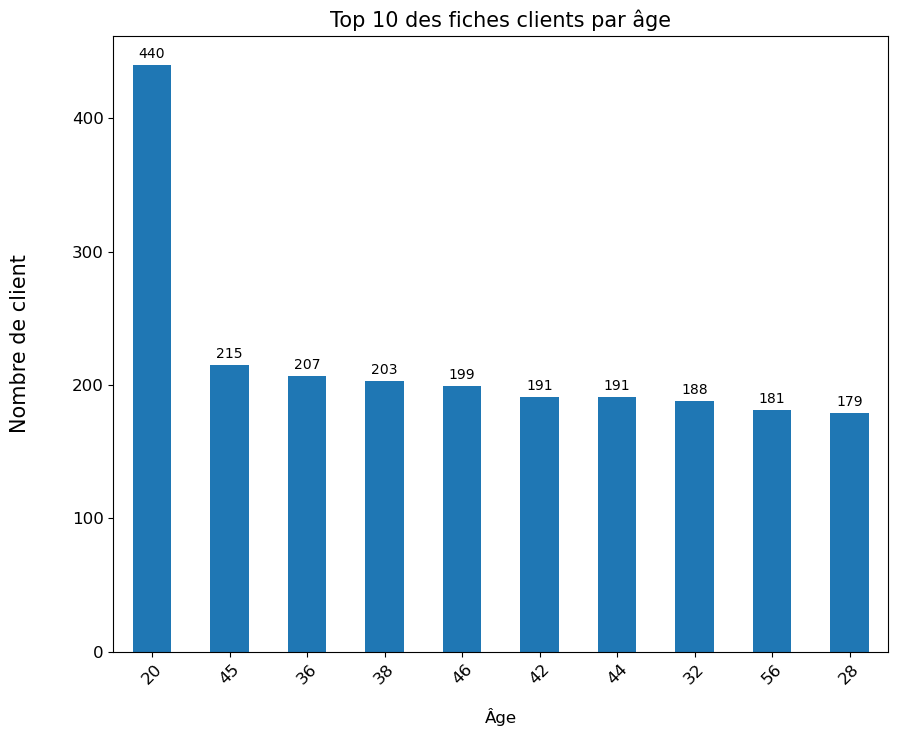

In [30]:
plt.figure(figsize=(10,8))

customers['age'].value_counts().head(10).plot(kind="bar")

for i, val in enumerate(customers['age'].value_counts().head(10)):
    plt.text(i, val + 3, str(val), ha='center', va='bottom')

plt.title("Top 10 des fiches clients par âge", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Âge", fontsize=12, labelpad=15)
plt.ylabel("Nombre de client", fontsize=15, labelpad=30)
plt.show()

Dans ce graphique, on a fait un top 10 des principaux fichiers clients, il est clair que les clients de 19 ans sont prédominants. Cependant, il est important de savoir que c'est une librairie en ligne donc ne permet pas aux mineurs de pouvoir effectuer des achats, les fiches clients ont été créé fin 2021, il est possible qu'ils étaient mineur lors de la création de leur fiche client. Par conséquent, cette répartition peut ne pas être entièrement représentative de notre clientèle réelle.

En commentaire, je peux indiquer que ce classement est basé sur l'âge, il est possible, malgré que les clients de 19 ans soient plus nombreux, ils réalisent des achats moins importants que d'autres clients plus âgés.

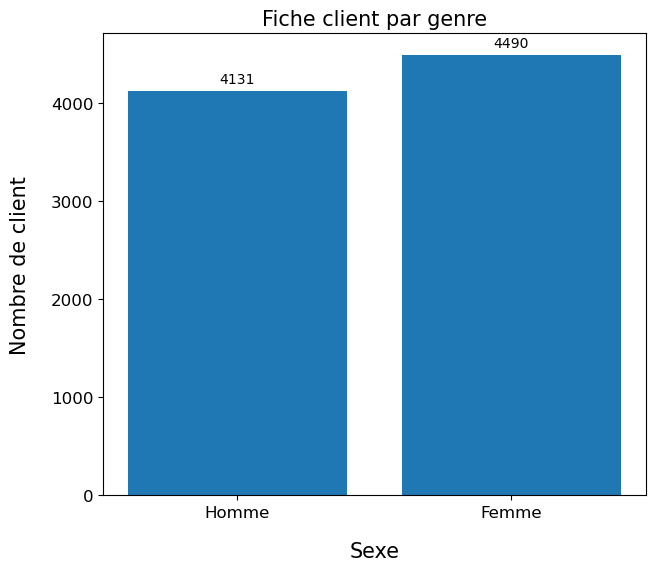

In [31]:

femme = customers.loc[customers['sex'] == "f"].value_counts().sum()
homme = customers.loc[customers['sex'] == "m"].value_counts().sum()

sexe_client = ['Homme', 'Femme']
group_by_sex_counted = [homme, femme]



plt.figure(figsize=(7,6))
plt.bar(sexe_client, group_by_sex_counted)
plt.title('Fiche client par genre', fontsize=15)
plt.xlabel("Sexe", fontsize=15, labelpad=15)
plt.ylabel("Nombre de client", fontsize=15, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(group_by_sex_counted):
    plt.text(i, val + 50 , str(val), ha='center', va='bottom')

#plt.savefig(fname="diapo4", bbox_inches='tight')
plt.show()

Dans ma base de données il y a 4131 hommes et 4490 femmes

<font size="5"><b>Les Produits</b></font>

In [32]:
products



,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


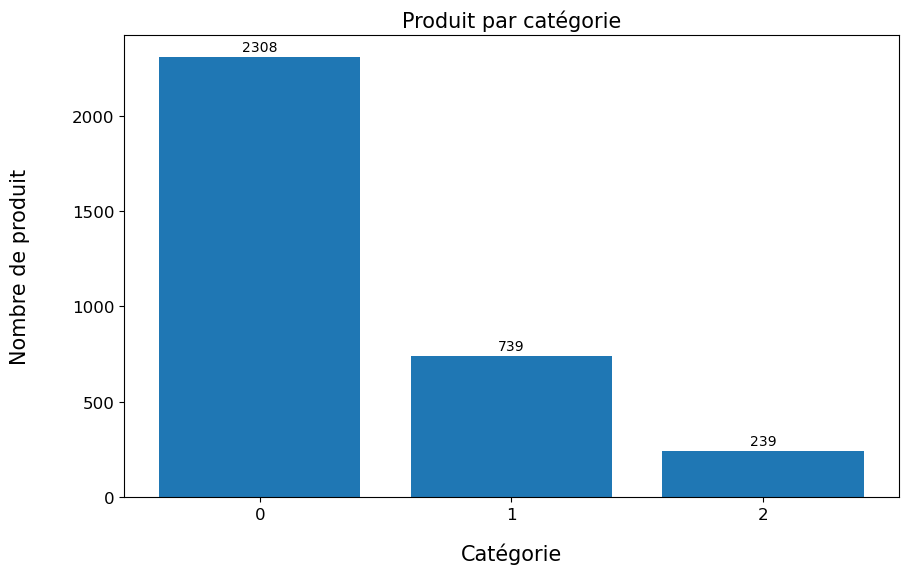

In [33]:
categ0 = products.loc[products['categ'] == 0].value_counts().sum()
categ1 = products.loc[products['categ'] == 1].value_counts().sum()
categ2 = products.loc[products['categ'] == 2].value_counts().sum()

categ_client = ['0', '1', '2']
group_by_categ_counted = [categ0, categ1, categ2]



plt.figure(figsize=(10,6))
plt.bar(categ_client, group_by_categ_counted)
plt.title('Produit par catégorie', fontsize=15)
plt.xlabel("Catégorie", fontsize=15, labelpad=15)
plt.ylabel("Nombre de produit", fontsize=15, labelpad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(group_by_categ_counted):
    plt.text(i, val + 15 , str(val), ha='center', va='bottom')


plt.show()

In [34]:
#On veut savoir la moyenne des prix par catégorie pour une première "analyse"

products.groupby(['categ'])['price'].mean()

categ
0     11.732795
1     25.531421
2    108.354686
Name: price, dtype: float64

La moyenne de prix des produits de la catégorie :
- 0 est de 11,73€
- 1 est de 25,45€
- 2 est de 108,35€

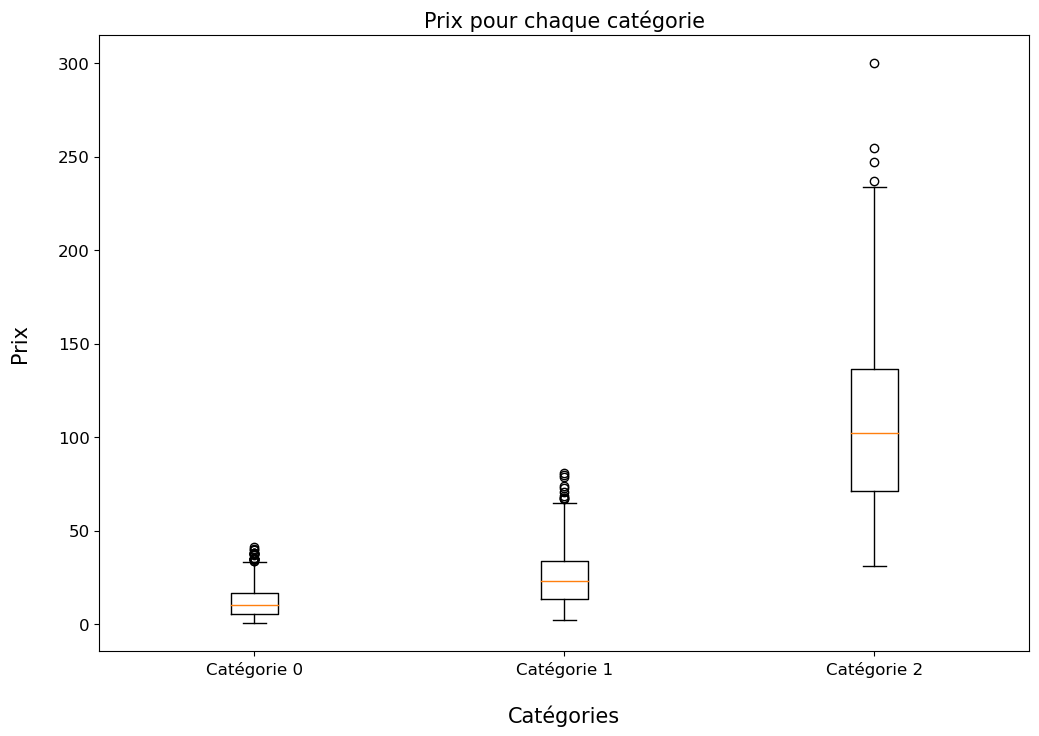

In [35]:
price_categ0 = products.loc[products['categ'] == 0]['price']
price_categ1 = products.loc[products['categ'] == 1]['price']
price_categ2 = products.loc[products['categ'] == 2]['price']

all_categ = [price_categ0, price_categ1, price_categ2]

plt.figure(figsize=(12, 8))

for i, data in enumerate(all_categ):
    plt.boxplot(data, positions=[i+1], labels=[f'Catégorie {i}'])

plt.title('Prix pour chaque catégorie', fontsize=15)
plt.xlabel('Catégories', labelpad=20, fontsize=15)
plt.ylabel('Prix', labelpad=20, fontsize=15)

plt.xticks(range(1, 4), ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Ce graphique montre la répartition des prix par catégorie. La catégorie 0 affiche des prix moyens plus bas que la catégorie 1 et la catégorie 2, d'où son nombre élevé de produits. En revanche, bien que la catégorie 1 ait des prix moyens plus élevés que la catégorie 0, elle enregistre moins d'articles. Finalement, la catégorie 2, avec des prix moyens encore plus élevés affiche une moins bonne répartition.

<font size="5"><b>Les Transactions</b></font>

In [36]:
df_library

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_buy,range_age
0,0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07,54,[50 - 55]
1,1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22,54,[50 - 55]
2,0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30,54,[50 - 55]
3,1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18,54,[50 - 55]
4,1_381,s_25561,c_329,15.99,1,f,1967,2021,4,25,13:26:06,54,[50 - 55]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,0_2194,s_181130,c_177,6.57,0,m,1973,2022,3,18,23:53:54,49,[44 - 50]
687530,0_1059,s_196094,c_177,18.99,0,m,1973,2022,4,18,23:45:11,49,[44 - 50]
687531,0_2194,s_196094,c_177,6.57,0,m,1973,2022,4,18,23:53:54,49,[44 - 50]
687532,0_1059,s_343601,c_177,18.99,0,m,1973,2023,2,18,23:45:11,50,[50 - 55]


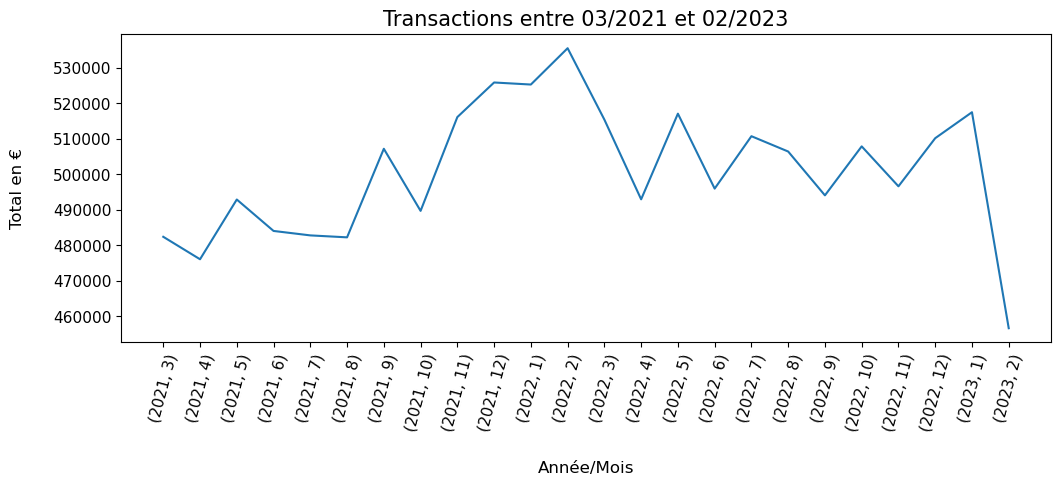

In [37]:
#On veut avoir un aperçu des transactions par mois/année

transaction_by_MY = df_library.groupby(['year', 'month'])['price'].sum()


transaction_by_MY.plot(figsize=(12, 4))

plt.title('Transactions entre 03/2021 et 02/2023', fontsize=15)
plt.xlabel('Année/Mois',fontsize=12,labelpad=20)
plt.ylabel('Total en €',fontsize=12,labelpad=20)
tick_pos = range(0, len(transaction_by_MY), 1)
plt.xticks(tick_pos, transaction_by_MY.index[tick_pos], rotation=75, fontsize=11)
plt.yticks(fontsize=11)

plt.show()

D'après ce graphique, on peut apercevoir une baisse pour le mois de Février 2023

In [38]:
#Je veux voir en détail ce qu'il se passe pour le mois de Février 2023

groupe_fevrier = (df_library['month'] == 2) & (df_library['year'] == 2023)

transactions_fevrier_2023 = df_library.loc[groupe_fevrier]

transactions_fevrier_2023

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_buy,range_age
58,0_1543,s_343247,c_329,13.99,0,f,1967,2023,2,18,06:49:20,56,[55 - 61]
59,0_1345,s_343247,c_329,17.99,0,f,1967,2023,2,18,06:54:01,56,[55 - 61]
60,0_1567,s_343247,c_329,16.99,0,f,1967,2023,2,18,07:18:15,56,[55 - 61]
61,0_2062,s_343247,c_329,16.01,0,f,1967,2023,2,18,07:28:19,56,[55 - 61]
62,1_462,s_343247,c_329,16.66,1,f,1967,2023,2,18,07:35:30,56,[55 - 61]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687497,2_209,s_344993,c_3631,69.99,2,f,2004,2023,2,21,21:26:07,19,[17 - 22]
687504,1_366,s_345020,c_4819,28.54,1,f,2004,2023,2,21,21:27:32,19,[17 - 22]
687514,1_369,s_347637,c_3058,23.99,1,m,1959,2023,2,27,08:59:50,64,[61 - 66]
687532,0_1059,s_343601,c_177,18.99,0,m,1973,2023,2,18,23:45:11,50,[50 - 55]


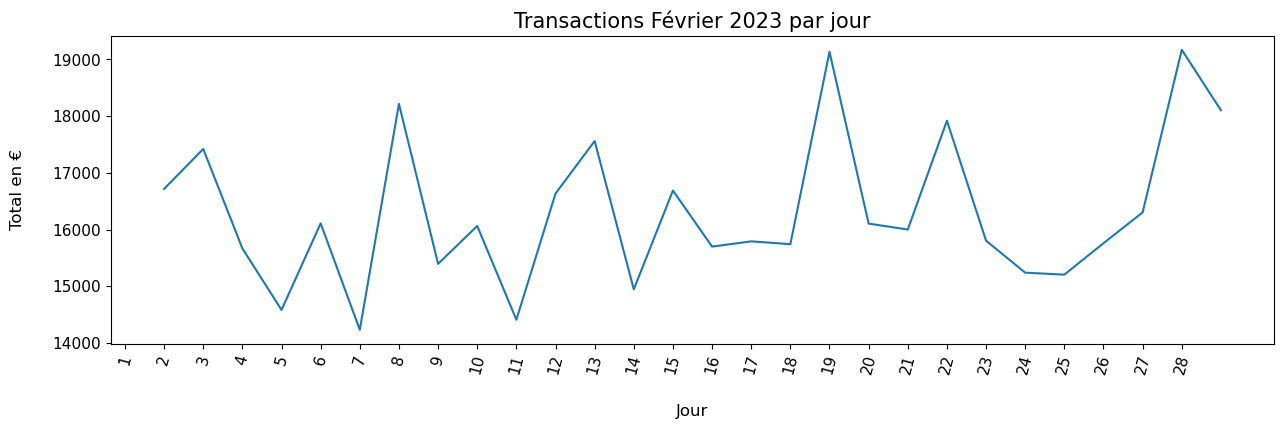

In [39]:
#Je veux interpréter ces données dans un graphique par le total des transactions en euros pour chaque jour de février

transactions_day = transactions_fevrier_2023.groupby('day')

sum_price_day = transactions_day['price'].sum()

sum_price_day.plot(figsize=(15, 4))

plt.title('Transactions Février 2023 par jour', fontsize=15)
plt.xlabel('Jour',fontsize=12,labelpad=20)
plt.ylabel('Total en €',fontsize=12,labelpad=20)
tick_pos = range(0, len(sum_price_day), 1)
plt.xticks(tick_pos, sum_price_day.index[tick_pos], rotation=75, fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [40]:
transaction_by_MY

year  month
2021  3        482440.61
      4        476109.30
      5        492943.47
      6        484088.56
      7        482835.40
      8        482284.79
      9        507240.68
      10       489743.61
      11       516167.73
      12       525917.28
2022  1        525338.99
      2        535571.50
      3        515456.53
      4        492998.94
      5        517132.60
      6        496016.12
      7        510783.12
      8        506467.27
      9        494114.53
      10       507917.77
      11       496664.94
      12       510219.50
2023  1        517540.55
      2        456679.76
Name: price, dtype: float64

In [41]:
#Je vérifie que le dernier jour de février est comptabilisé

transactions_fevrier_2023.loc[transactions_fevrier_2023['day'] == 28]

,id_prod,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_buy,range_age
26664,0_1513,s_347974,c_1609,8.99,0,m,1980,2023,2,28,00:26:12,43,[39 - 44]
26665,1_730,s_347974,c_1609,22.65,1,m,1980,2023,2,28,00:58:47,43,[39 - 44]
26666,0_1527,s_348108,c_1609,7.99,0,m,1980,2023,2,28,06:46:18,43,[39 - 44]
26667,0_1391,s_348108,c_1609,7.99,0,m,1980,2023,2,28,07:07:29,43,[39 - 44]
26668,0_2207,s_348108,c_1609,7.99,0,m,1980,2023,2,28,07:30:03,43,[39 - 44]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683540,0_1984,s_348197,c_1316,5.70,0,f,1960,2023,2,28,12:10:10,63,[61 - 66]
685760,1_353,s_348260,c_3115,26.99,1,f,1997,2023,2,28,14:23:13,26,[22 - 28]
685761,2_102,s_348260,c_3115,59.14,2,f,1997,2023,2,28,14:45:57,26,[22 - 28]
685762,2_163,s_348260,c_3115,68.99,2,f,1997,2023,2,28,14:49:46,26,[22 - 28]


In [42]:
#Je veux voir quelques transactions les moins coûteux


transactions_fevrier_2023['price'].sort_values(ascending=True).head(30)

189151    0.66
464470    0.66
513515    0.81
581114    0.81
328266    0.99
108349    0.99
227135    1.09
497366    1.23
654053    1.49
563351    1.58
432802    1.68
489375    1.73
434397    1.73
464951    1.78
250766    1.96
284836    1.98
601722    1.99
314843    1.99
610164    1.99
252471    1.99
146008    1.99
241426    1.99
134011    1.99
106433    1.99
233281    1.99
165219    1.99
225574    1.99
99854     1.99
524578    2.00
26254     2.00
Name: price, dtype: float64

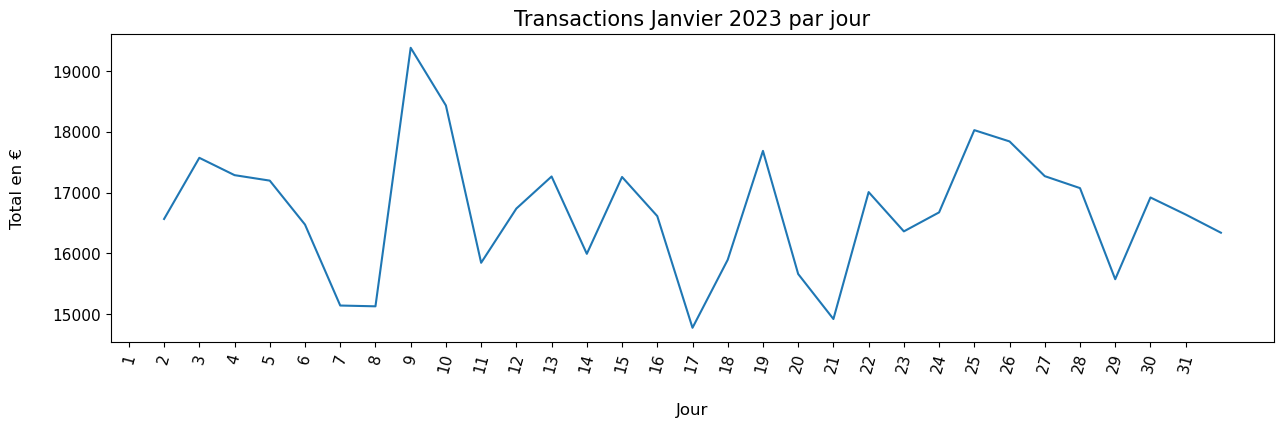

In [43]:
#Je compare avec le mois de Janvier

groupe_janv = (df_library['month'] == 1) & (df_library['year'] == 2023)

transactions_janvier_2023 = df_library.loc[groupe_janv]

transactions_day_janv = transactions_janvier_2023.groupby('day')

sum_price_day_janv = transactions_day_janv['price'].sum()

sum_price_day_janv.plot(figsize=(15, 4))

plt.title('Transactions Janvier 2023 par jour', fontsize=15)
plt.xlabel('Jour',fontsize=12,labelpad=20)
plt.ylabel('Total en €',fontsize=12,labelpad=20)
tick_pos = range(0, len(sum_price_day_janv), 1)
plt.xticks(tick_pos, sum_price_day_janv.index[tick_pos], rotation=75, fontsize=11)
plt.yticks(fontsize=11)

plt.show()

Avec les deux graphiques 

In [44]:
df_library.to_csv('BDD/df_clean.csv', index=False)